In [58]:
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
import dateutil

In [59]:
filename = '../data/export20181203-163726.csv'
fp = open(filename,'r')

readings = []

for line in fp:
    readings.append(line)

In [45]:
glucose_df = pd.DataFrame(index=None)
glucose_df['date'] = pd.Series(dtype='datetime64[ns]')
glucose_df['glucose'] = pd.Series(dtype='int64')

In [46]:
for i in range(1,len(readings)):
    reading = readings[i]
    year = reading.split('.')[2].split(';')[0]
    month = reading.split('.')[1]
    day = reading.split('.')[0]
    time = reading.split(';')[1]
    date = dateutil.parser.parse(year+'-'+month+'-'+day+' '+time)
    try:
        glucose = int(reading.split(';')[2])
        glucose_df.loc[i-1] = [date, glucose]
    except:
        continue
    #print("%s %s" % (date, glucose))
    #glucose_df.loc[i-1] = [date, glucose]

In [47]:
glucose_df.glucose = glucose_df.glucose.astype(pd.np.int64)
glucose_df.head()

,date,glucose
0,2018-08-10 00:02:00,319
1,2018-08-10 00:07:00,325
2,2018-08-10 00:12:00,328
3,2018-08-10 00:17:00,329
4,2018-08-10 00:22:00,329


In [37]:
glucose_df.dtypes

date       datetime64[ns]
glucose            object
dtype: object

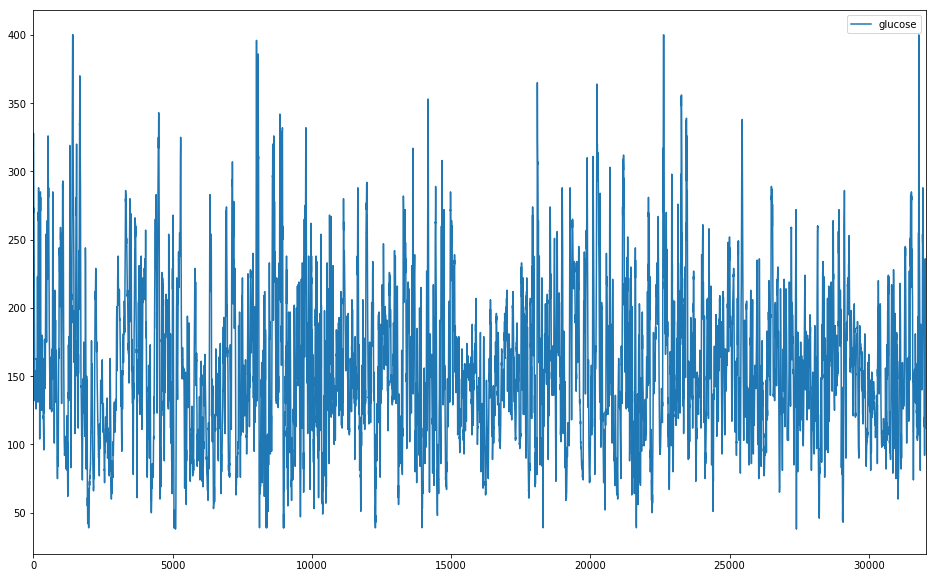

In [57]:
glucose_df.plot(figsize=(16,10))

In [67]:
df2 = glucose_df.query('date >= "2018-11-20"')

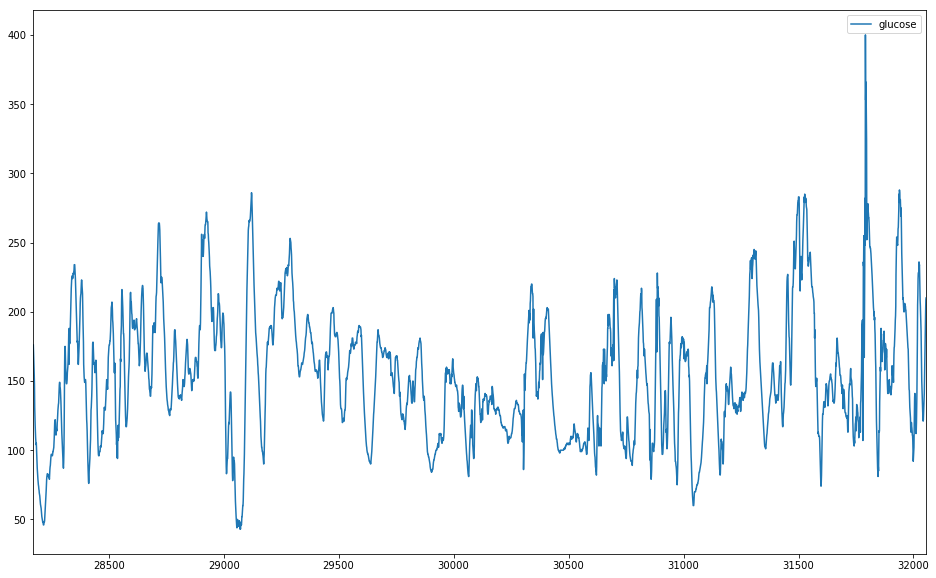

In [68]:
df2.plot(figsize=(16,10))

In [77]:
df3 = glucose_df.copy()
df3['1daymean'] = pd.rolling_mean(glucose_df['glucose'], window=288)
df3['median'] = pd.rolling_quantile(df3['glucose'], window=288, quantile=0.50)

/Users/hilja10/anaconda3/envs/featurevelocity/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=288,center=False).mean()
  
/Users/hilja10/anaconda3/envs/featurevelocity/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_quantile is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=288,center=False).quantile(quantile=0.5)
  This is separate from the ipykernel package so we can avoid doing imports until


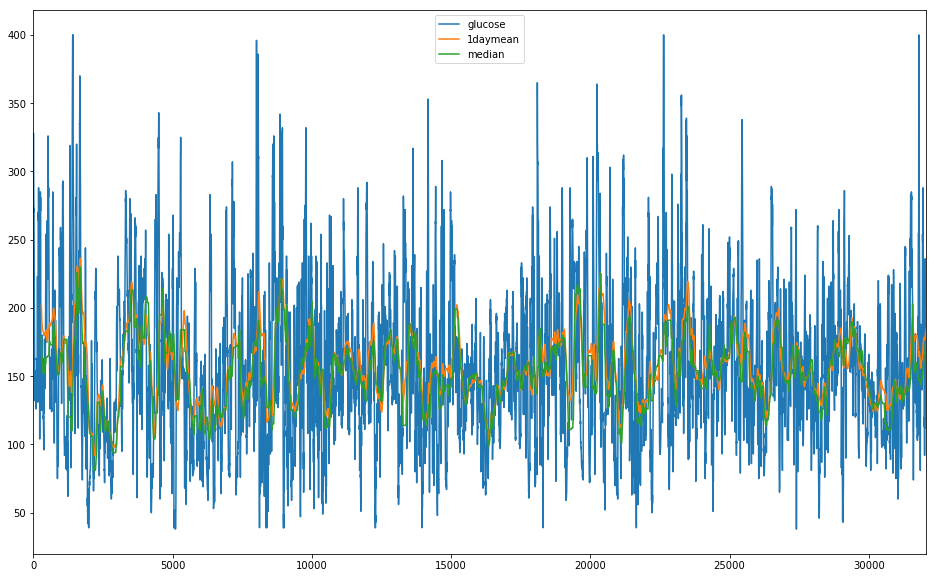

In [78]:
df3.plot(figsize=(16,10))

In [81]:
df4 = df3.query('date >= "2018-12-01"')

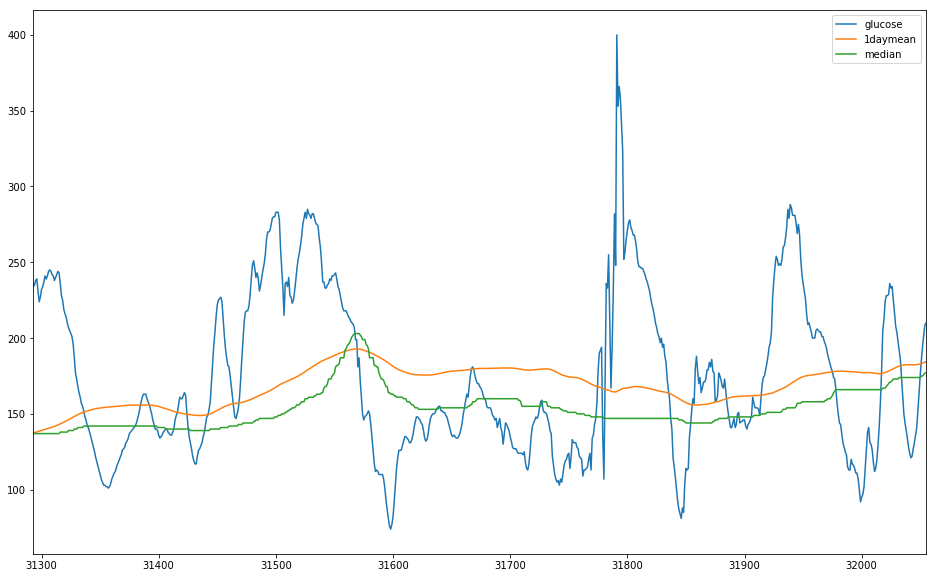

In [82]:
df4.plot(figsize=(16,10))

In [76]:
pd.rolling_quantile?